In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
import imutils

In [41]:
def find_histogram(clt):
    """
    create a histogram with k clusters
    :param: clt
    :return:hist
    """
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    hist = hist.astype("float")
    hist /= hist.sum()

    return hist

def plot_colors2(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar
#gray convert
# def edge_detect(img_BGR,th_low,th_high):
#     gray = cv2.cvtColor(img_BGR,cv2.COLOR_BGR2GRAY)
#     plt.imshow(gray, cmap='gray')
#     edges = cv2.Canny(gray,th_low,th_high)
#     return edges

#hsv convert
def edge_detect(img_BGR,th_low,th_high):
    
    hsv = cv2.cvtColor(img_BGR,cv2.COLOR_BGR2HSV)

    
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)

    res = cv2.bitwise_and(img_BGR,img_BGR, mask= mask)
    
   
    
    edges = cv2.Canny(img_BGR,100,200)
    plt.imshow(edges, cmap ='gray')
    plt.show()
#     return edges



# img = img.reshape((img.shape[0] * img.shape[1],3)) #represent as row*column,channel number
# clt = KMeans(n_clusters=3) #cluster number
# clt.fit(img)

# hist = find_histogram(clt)
# bar = plot_colors2(hist, clt.cluster_centers_)

# f = plt.figure()
# f.add_subplot(1,2,1)
# plt.imshow(bar)
# f.add_subplot(1,2,2)
# plt.imshow(img_holder)
# plt.show(block=True)

# f = plt.figure()
# f.add_subplot(1,2,1)
# plt.imshow(edges,cmap='gray')
# f.add_subplot(1,2,2)
# plt.imshow(img_holder)
# plt.show(block=True)

# Add cvt gray
# Add edge detection
# track people 
# need to work on multiple images


In [72]:
def convert_hsv(img_BGR):
    hsv = cv2.cvtColor(img_BGR,cv2.COLOR_BGR2HSV)
    h = hsv[:,:,0]
    s = hsv[:,:,1]
    v = hsv[:,:,2]
    hsv_list =[]
    hsv_list.append(h)
    hsv_list.append(s)
    hsv_list.append(v)
    fig, axs = plt.subplots(1,len(hsv_list), figsize=(60,30))
    fig.subplots_adjust(hspace= .2, wspace = .001)
    axs = axs.ravel()
    for i in range(len(hsv_list)):
        image = hsv_list[i]
        axs[i].axis('off')
        axs[i].imshow(image)



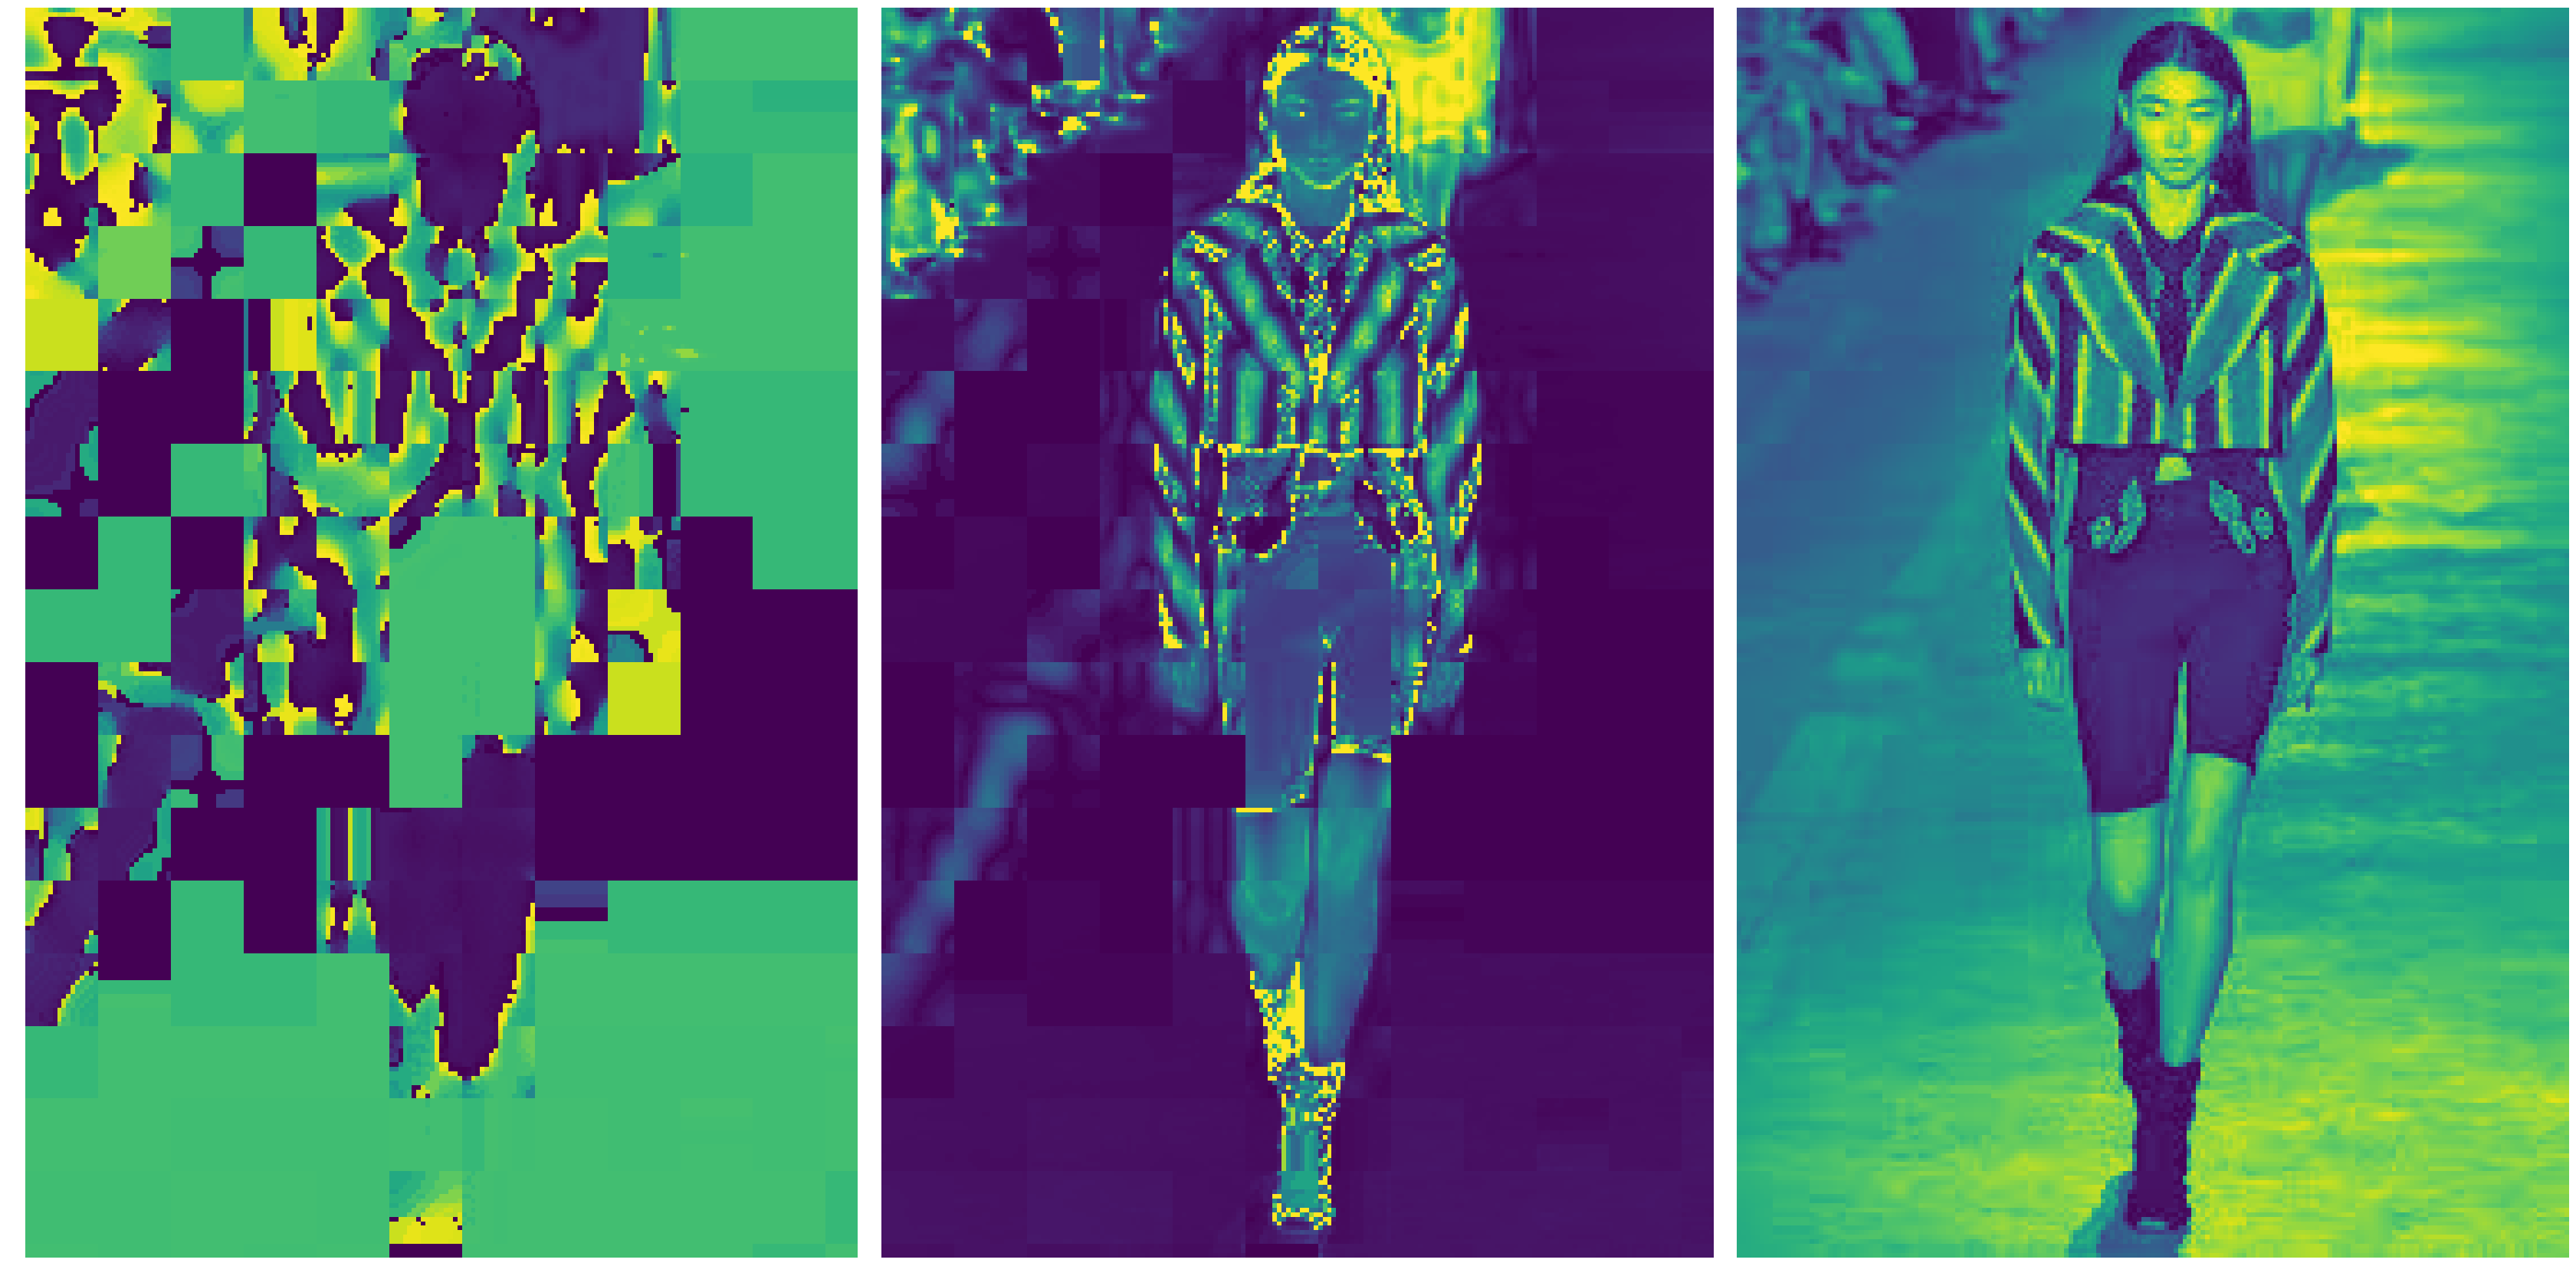

In [74]:
img_BGR = cv2.imread("8.jpg")
convert_hsv(img_BGR)
# img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
# img_holder = img_RGB
# edges = edge_detect(img_BGR,100,150)

In [4]:
image_list = []
image_name = []

#read images
for filename in glob.glob('*.jpg'):
    im = cv2.imread(filename)        # cv2.imread gets BGR image
    b,g,r = cv2.split(im)            # get b,g,r convert to RGB
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    image_list.append(rgb_img)
    image_name.append(filename)

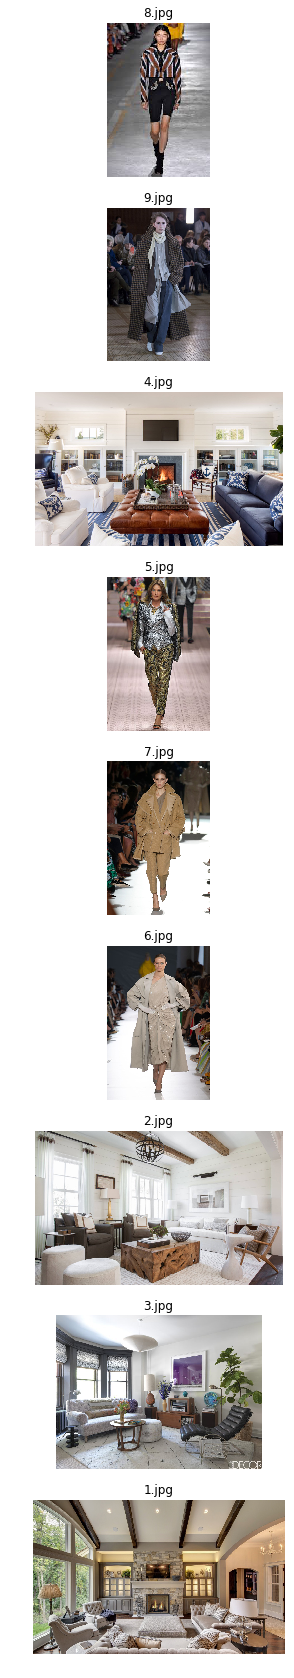

In [5]:

# display images
fig, axs = plt.subplots(len(image_list), 1, figsize=(60,30))
fig.subplots_adjust(hspace= .2, wspace = .001)
axs = axs.ravel()
for i in range(len(image_list)):
    image = image_list[i]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(image_name[i])